In [73]:
# Script that returns statistics on File Count and File Size for Experimental Strategies, broken down by Project
# PRODUCTION

In [74]:
import requests
import json

def GetProjects(): # Get List of Projets and assign in variable called p_list
    project_list = 'https://gdc-api.nci.nih.gov/projects?size=1000'

    projects = requests.get(project_list)
    data = json.loads(projects.text)
    current_data = data['data']['hits']

    p_list = []
    
    for i in range(len(current_data)):
        p_list.append(current_data[i]['project_id'])
    return p_list

In [75]:
def GetRequests(PList,ES): # Create API Requests and append them to a list titled 'Requests'

    API_URL = 'https://gdc-api.nci.nih.gov/'
    Endpoint = 'files'
    Fields = 'file_size'
    Size = '100000'
    
    Requests = []
    for Project in PList:
        Filters = '%7B%22op%22%3A%22and%22%2C%22content%22%3A%5B%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22cases.project.project_id%22%2C%22value%22%3A%5B%22'+Project+'%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.experimental_strategy%22%2C%22value%22%3A%5B%22'+ES+'%22%5D%7D%7D%5D%7D'
        Request = API_URL+Endpoint+'?'+'filters='+Filters+'&'+'fields='+Fields+'&'+'size='+Size
        Requests.append(Request)
    return Requests

In [76]:
def ExtractData(Request_List): # Excute the API Requests and append to a list titled 'Data'

    Data = []
    for RQ in Request_List:
            r = requests.get(RQ)
            data = json.loads(r.text)
            current_data = data['data']['hits']
            Data.append(current_data)
    return Data

In [77]:
def GetFile_Size_Count(Data): # Extract data to get file count and file size for each set of projecfts
    File_Count = []
    File_Size = []
    for P in range(len(Data)):
        File_Count.append(len(Data[P]))

        File_Size_List = []
        for results in range(len(Data[P])):
            File_Size_List.append(Data[P][results]['file_size'])

        File_Size_List_Int = map(int, File_Size_List)
        File_Size.append(sum(File_Size_List_Int))
        
    return File_Count,File_Size

In [78]:
import pandas as pd

# Get Projects
Project_List = GetProjects()

# List Experimental Strategies Available
ES_List = ['WXS','RNA-Seq','miRNA-Seq','Genotyping%20Array','Methylation%20Array']

# Loop through experimental strategies creating a data frame of file size and counts for each one
ES_Results = []
for ES in ES_List:
    RQs = GetRequests(Project_List, ES)
    Data = ExtractData(RQs)
    Size_Count = GetFile_Size_Count(Data)
    DataFrame = pd.DataFrame(index=Project_List,data={ES + ' File Count': Size_Count[0],ES + ' File Size (Bytes)': Size_Count[1]})
    ES_Results.append(DataFrame)

# Create Data Frame of All Experimental Strategies
ES_Final = pd.merge(ES_Results[0], ES_Results[1], left_index=True, right_index=True)
for i in range(len(ES_List)-2):
    ES_Final = pd.merge(ES_Final, ES_Results[i+2], left_index=True, right_index=True)
ES_Final

,WXS File Count,WXS File Size (Bytes),RNA-Seq File Count,RNA-Seq File Size (Bytes),miRNA-Seq File Count,miRNA-Seq File Size (Bytes),Genotyping%20Array File Count,Genotyping%20Array File Size (Bytes),Methylation%20Array File Count,Methylation%20Array File Size (Bytes)
TCGA-LIHC,3820,13494979907386,1696,3053981953552,1275,108718319448,1536,47908303,430,60752491344
TCGA-HNSC,5202,12886955567338,2184,4523661669179,1707,151573011338,2166,67099796,580,81943390382
TCGA-COAD,4925,22968049327840,2084,2992986430418,1395,97570001457,1944,64565940,556,51891049249
TCGA-PAAD,1855,14494111199647,728,1309097221194,549,53872634355,736,27287476,195,27548810025
TARGET-WT,378,1840008256823,528,1929310332987,414,48906195035,0,0,0,0
TCGA-UCS,578,1813461639389,224,432387705565,171,14416447286,220,7511410,57,8053315668
TCGA-UVM,808,1314870415799,320,564824630604,240,22448370028,320,7896559,80,11304729851
TCGA-STAD,4462,12166298920194,1628,7011879492350,1473,142564421267,1812,61695900,470,56810765703
TCGA-LUSC,5652,16573583370283,2204,4833588981078,1569,115946228500,2118,81695094,573,59813232547
TCGA-UCEC,5620,19386808197884,2348,2584573804511,1737,151288495688,2188,82123415,603,69698924387


In [79]:
# Save the Data Frame to a file
ES_Final.to_csv(path_or_buf='Prod_Files_Per_Project.tsv',sep='\t', header=True)

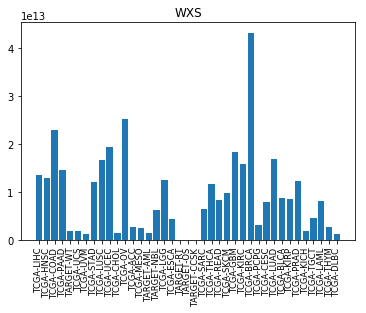

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
X = Project_List
Y = ES_Final['WXS File Size (Bytes)'].tolist()

# Create Histogram of WXS Data
plt.bar(range(len(Y)), Y, align='center')
plt.xticks(range(len(Y)), X, size='small',rotation='vertical')
plt.title('WXS')
plt.show()